In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
#### DATA: DO NOT EDIT THIS CELL ####
X = np.array([[1, -3], [1, 0], [4, 1], [3, 7], [0, -2],
             [-1, -6], [2, 5], [1, 2], [0, -1], [-1, -4],
             [0, 7], [1, 5], [-4, 4], [2, 9], [-2, 2],
             [-2, 0], [-3, -2], [-2, -4], [3, 10], [-3, -8]]).T
y = np.array([1, 1, 1, 1, 1,
             1, 1, 1, 1, 1,
             -1, -1, -1, -1, -1,
             -1, -1, -1, -1, -1])

In [55]:
print(X.shape) #(d , n)
print(y.shape) #(n,0)

(2, 20)
(20,)


## viualize dataset

In [56]:
y_color = np.where(y==1 , 'green' , 'red')
print(y)
print(y_color)

[ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
['green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red']


In [57]:
feature1 = X[0, :]

In [58]:
feature2 = X[1 , :]

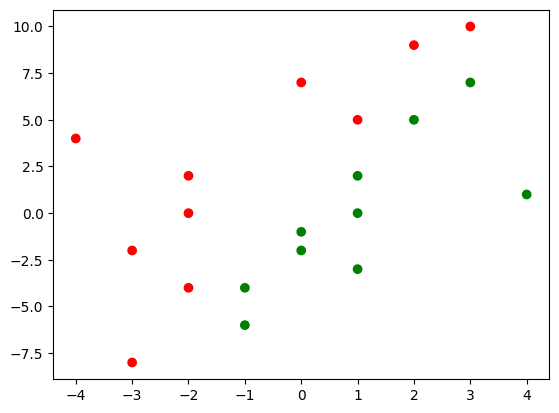

In [59]:
plt.scatter(feature1 , feature2 , c = y_color )

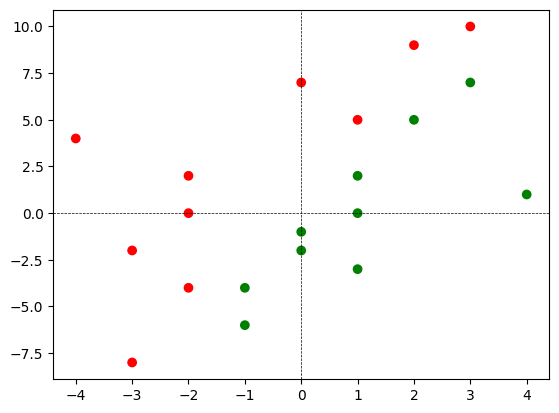

In [60]:
plt.scatter(feature1 , feature2 , c = y_color )
plt.axhline(color = 'black' , linewidth = 0.5 , linestyle = '--')
plt.axvline(color = 'black' , linewidth = 0.5 , linestyle = '--')

## Linear seprability

veify linar seprability can't prove it

In [61]:
d , n = X.shape

In [62]:
# initialize weight vector
w = np.zeros(d)
w

array([0., 0.])

In [63]:
correct = 0
i = 0
epochs = 0
while correct != n:
    #Prediction
    y_hat = 1 if w @ X[: , i] >=0 else -1
    # mistake
    if y_hat != y[i]:
        w += X[: , i] * y[i]
        correct = 0
    else:
        correct +=1
    i +=1
    #cycle back
    if i ==n :
        i = 0
        epochs +=1
print(f"{epochs=}")
print(w)

epochs=4
[14. -5.]


In [64]:
w_norm = np.linalg.norm(w)
w/=w_norm
w

array([ 0.94174191, -0.3363364 ])

#### visualize perceptron weight vector

(-6.0, 6.0)

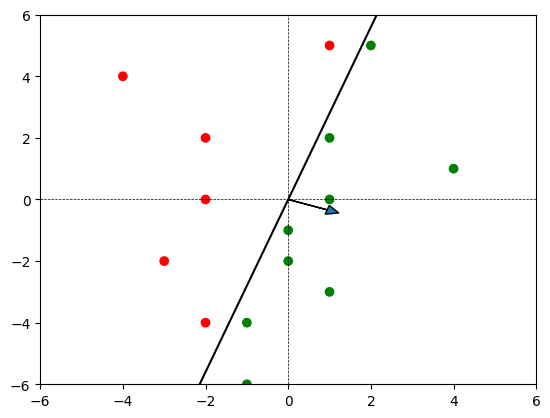

In [65]:
plt.scatter(feature1 , feature2 , c = y_color )
plt.axhline(color = 'black' , linewidth = 0.5 , linestyle = '--')
plt.axvline(color = 'black' , linewidth = 0.5 , linestyle = '--')

x_db = np.linspace(-4 , 4)
y_db = -w[0]/w[1]*x_db
plt.plot(x_db , y_db , color = 'black')
plt.arrow(0,0,w[0],w[1] , head_width = 0.3 , head_length = 0.3)
plt.xlim(-6,6)
plt.ylim(-6,6)


## computing dual objective

In [66]:
Y = np.diag(y)
print(y)
print(Y)

[ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 

In [67]:
# computing matrix Q = Y.T @ X.T @ X @ Y
Q = Y.T @ X.T @ X @ Y
# print(Q)
# print(Q.shape)
df_Q = pd.DataFrame(Q)
df_Q

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,10,1,1,-18,6,17,-13,-5,3,11,21,14,16,25,8,2,-3,-10,27,-21
1,1,1,4,3,0,-1,2,1,0,-1,0,-1,4,-2,2,2,3,2,-3,3
2,1,4,17,19,-2,-10,13,6,-1,-8,-7,-9,12,-17,6,8,14,12,-22,20
3,-18,3,19,58,-14,-45,41,17,-7,-31,-49,-38,-16,-69,-8,6,23,34,-79,65
4,6,0,-2,-14,4,12,-10,-4,2,8,14,10,8,18,4,0,-4,-8,20,-16
5,17,-1,-10,-45,12,37,-32,-13,6,25,42,31,20,56,10,-2,-15,-26,63,-51
6,-13,2,13,41,-10,-32,29,12,-5,-22,-35,-27,-12,-49,-6,4,16,24,-56,46
7,-5,1,6,17,-4,-13,12,5,-2,-9,-14,-11,-4,-20,-2,2,7,10,-23,19
8,3,0,-1,-7,2,6,-5,-2,1,4,7,5,4,9,2,0,-2,-4,10,-8
9,11,-1,-8,-31,8,25,-22,-9,4,17,28,21,12,38,6,-2,-11,-18,43,-35


In [68]:
def f(alpha):
    return 0.5 * alpha @ Q @ alpha - alpha.sum()

In [69]:
from scipy import optimize
alpha_int = np.zeros(n)
res = optimize.minimize(f , alpha_int , bounds = optimize.Bounds(0, np.inf))
res

  message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  success: True
   status: 0
      fun: -4.999999999581572
        x: [ 0.000e+00  0.000e+00 ...  1.714e+00  1.629e+00]
      nit: 30
      jac: [ 5.000e+00  2.000e+00 ...  2.967e-04 -2.453e-04]
     nfev: 735
     njev: 35
 hess_inv: <20x20 LbfgsInvHessProduct with dtype=float64>

In [70]:
alpha_str = res.x
alpha_str

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.64285435, 1.65714097, 1.67142693, 1.68571249,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.71428413, 1.62856734])

## Suppert vectors


In [71]:
X_sup = X[: , alpha_str > 0]
X_sup

array([[ 2,  1,  0, -1,  3, -3],
       [ 5,  2, -1, -4, 10, -8]])

In [72]:
y_sup = y[alpha_str >0]
y_sup_color = np.where(y_sup ==1 , 'green','red')
print(y_sup.shape[0]) # 6 support vector

6


## Optimal weight vector(Primal solution)

Let use now find the optimal weight vector

In [73]:
w_star = X @ Y @ alpha_str
w_star

array([ 2.99998682, -1.00002575])

## Decision Boundary 

Now we plot the decision boundary along with supporting hyperplane.
Note where the support vectors lie in the plot.

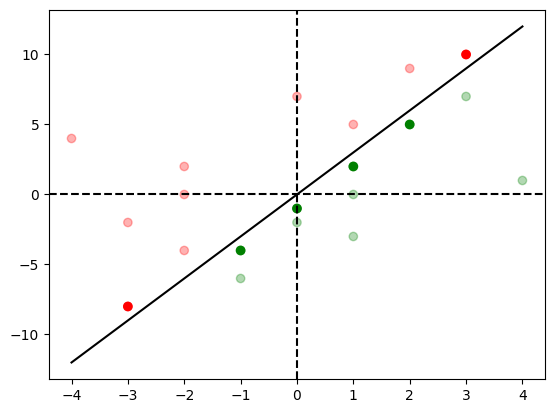

In [83]:
def plt_db(w):
    plt.scatter(X[0,:],X[1 , :],c = y_color,alpha = 0.3)
    plt.scatter(X_sup[0,:],X_sup[1,:],c = y_sup_color)
    plt.axhline(color = 'black' , linestyle = '--')
    plt.axvline(color = 'black',linestyle = '--')
    x_db = np.linspace(-4,4)
    y_db = -w[0] /w[1] *x_db
    plt.plot(x_db , y_db  , color = 'black')
plt_db(w_star)

## Trying sklean

In [75]:
from sklearn.svm import SVC

# Assume X and y are already defined
model = SVC(kernel='linear')
model.fit(X.T, y)
w = model.coef_[0]# This is the optimal weight vector
w


array([ 1.99973295, -0.66648863])